In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Data Science\Datasets\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [4]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# We'll separate the annual income and spending rate into new df

x = df.iloc[:,[3,4]]
x.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
# Making feature names easy to read by renaming them
df.rename(index=str, columns={'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace=True)

In [7]:
# Creating a new dataframe 'X' with 3 numerical features.
X = df.drop(['CustomerID', 'Gender'], axis=1) 
#New Required dataset with feature 'Age', 'Income' and 'Score'
from sklearn.preprocessing import normalize, StandardScaler
# Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data
# approximately follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

# Renaming the columns
X_normalized.columns = X.columns

numerical_features = ['Age','Income','Score']
X_normalized.head()

,Age,Income,Score
0,-0.622173,-0.759499,-0.189897
1,-0.518894,-0.704396,0.484330
2,-0.488556,-0.614244,-0.619691
3,-0.495541,-0.740949,0.453247
4,-0.313049,-0.923896,-0.220036


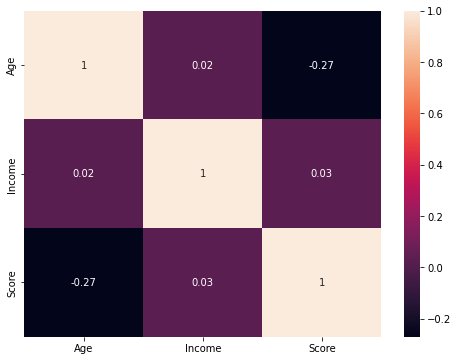

In [8]:
"""### Correlation"""
#Plot the correlation map, with annotations rounded off to 2 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(round(X_normalized[numerical_features].corr(method='spearman'), 2), annot=True)
plt.show()

### Affinity Propogation

c:\python38-32\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
c:\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


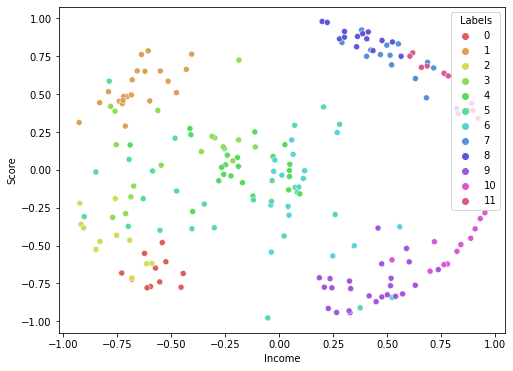

Silhouette Score(n=2): 0.6499805943435014


In [9]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score
# Fit Affinity Propagation with Scikit
afprop = AffinityPropagation(max_iter=250)
afprop.fit(X)
cluster_centers_indices = afprop.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
# Predict the cluster for all the samples
P = afprop.predict(X)
X_normalized['Labels'] = afprop.labels_
# Visualizing the results
plt.figure(figsize=(8, 6))
sns.scatterplot(X_normalized['Income'], X_normalized['Score'],hue=X_normalized['Labels'],
                palette=sns.color_palette('hls',np.unique(afprop.labels_).shape[0]))
plt.show()
# Calculating the Silhouette Score for Affinity Propagation Model
AFPROP_score = silhouette_score(X_normalized, afprop.labels_)
print(f'Silhouette Score(n=2): {AFPROP_score}')

### K means

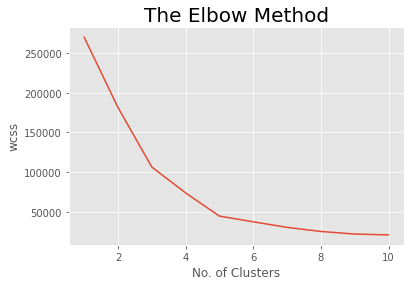

In [10]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.style.use('ggplot')
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

Within-Cluster-Sum-of-Squares (WCSS) is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow.

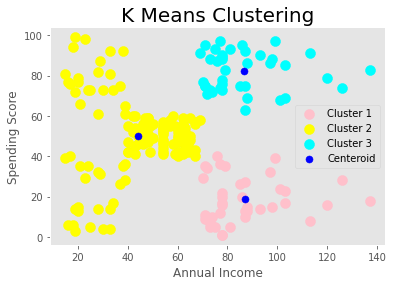

In [11]:
# Plotting the clusters

x = np.array(x)

km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.style.use('ggplot')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

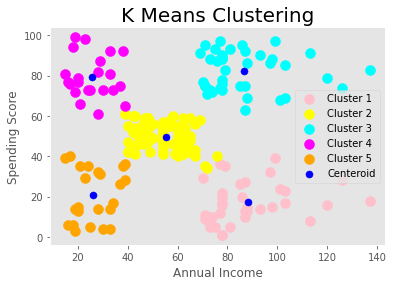

In [12]:
# Plotting the clusters

x = np.array(x)

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'Centeroid')

plt.style.use('ggplot')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [13]:
from sklearn import metrics
silhouette_vals = metrics.silhouette_samples(x, y_means)
avg_score_kmean = np.mean(silhouette_vals)
print(avg_score_kmean)

0.553931997444648


### Mini Batch "K" means

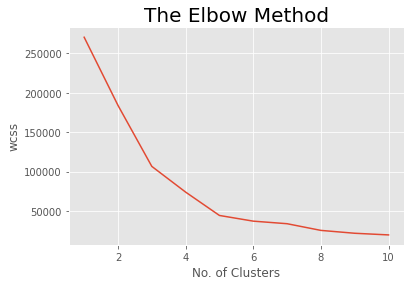

In [14]:
from sklearn.cluster import MiniBatchKMeans

wcssK = []
for i in range(1, 11):
    Mk = MiniBatchKMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    Mk.fit(x)
    wcssK.append(Mk.inertia_)
plt.style.use('ggplot')
plt.plot(range(1, 11), wcssK)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

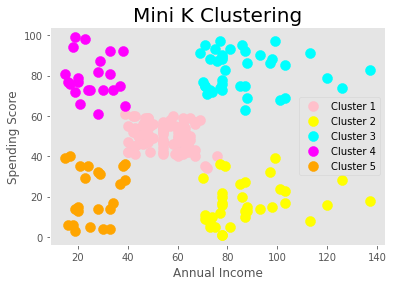

In [22]:
x = np.array(x)

Mk = MiniBatchKMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = Mk.fit_predict(x)
plt.style.use('ggplot')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.title('Mini K Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [23]:
silhouette_vals = metrics.silhouette_samples(x, y_means)
avg_score_mini = np.mean(silhouette_vals)
print(avg_score_mini)

0.553931997444648


[0.553931997444648, 0.6499805943435014, 0.553931997444648]


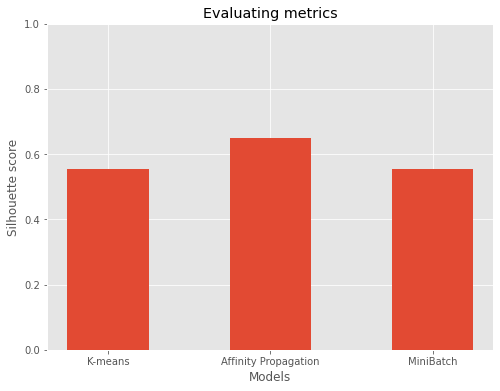

In [21]:
# Comparing Silhouette Score of all the 3 models.
# Plotting/Visual Comparison makes it easier to compare
algo = ['K-means','Affinity Propagation','MiniBatch']
score = [avg_score_kmean,AFPROP_score,avg_score_mini]
# Print the score values as well.
print(score)
plt.figure(figsize=(8,6))
plt.bar(algo,score,width=0.5)
plt.title('Evaluating metrics')
plt.xlabel('Models')
plt.ylabel('Silhouette score')
plt.ylim(0,1)
plt.show()